In [154]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [155]:
 
df = pd.read_csv('Crop_recommendation.csv')

In [156]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [157]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [158]:
df.size

17600

In [159]:
df.shape

(2200, 8)

In [160]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [161]:
arr=df['label'].unique()

In [162]:
arr

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [163]:
arr.size

22

In [164]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [165]:
df['label'].value_counts()

lentil         100
coconut        100
grapes         100
pomegranate    100
cotton         100
watermelon     100
chickpea       100
blackgram      100
orange         100
coffee         100
mango          100
maize          100
rice           100
banana         100
apple          100
pigeonpeas     100
muskmelon      100
mungbean       100
mothbeans      100
jute           100
kidneybeans    100
papaya         100
Name: label, dtype: int64

<AxesSubplot:>

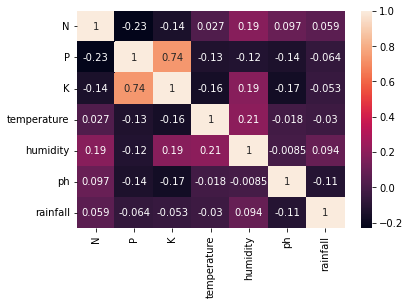

In [166]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='K'>

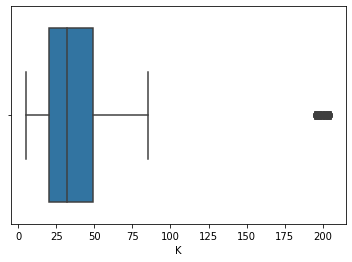

In [167]:
sns.boxplot(df['K'])

In [168]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']

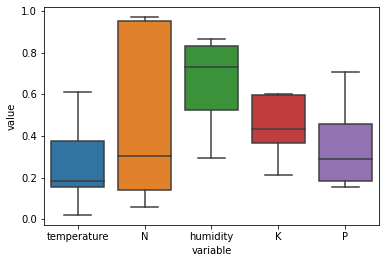

In [169]:
import numpy as np; np.random.seed(42)

df = pd.DataFrame(data = np.random.random(size=(5,5)), columns = ['temperature','N','humidity','K','P'])

sns.boxplot(x="variable", y="value", data=pd.melt(df))

plt.show()

In [170]:
# Initializing empty lists to append all model's name and corresponding name
acc = []
modelName = []
actualModel=[]

In [171]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.3,random_state =2)

In [172]:
Ytest

2121         coffee
960     pomegranate
952     pomegranate
1958         cotton
681        mungbean
           ...     
794       blackgram
287        chickpea
1054         banana
2042           jute
1719         papaya
Name: label, Length: 660, dtype: object

In [173]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
modelName.append('Decision Tree')
actualModel.append(DecisionTree)
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  85.9090909090909
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        26
   blackgram       0.65      1.00      0.79        28
    chickpea       1.00      1.00      1.00        29
     coconut       0.94      1.00      0.97        31
      coffee       1.00      1.00      1.00        33
      cotton       1.00      0.97      0.98        31
      grapes       1.00      1.00      1.00        29
        jute       0.50      0.03      0.06        33
 kidneybeans       0.00      0.00      0.00        30
      lentil       0.63      1.00      0.77        32
       maize       0.97      1.00      0.98        32
       mango       1.00      1.00      1.00        33
   mothbeans       0.00      0.00      0.00        29
    mungbean       1.00      1.00      1.00        32
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00 

In [174]:
from sklearn.model_selection import cross_val_score

In [175]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)

In [176]:
score

array([0.93636364, 0.90909091, 0.91818182, 0.87045455, 0.93636364])

In [177]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = 'DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

In [178]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
modelName.append('Naive Bayes')
actualModel.append(NaiveBayes)
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.9924242424242424
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        26
   blackgram       1.00      1.00      1.00        28
    chickpea       1.00      1.00      1.00        29
     coconut       1.00      1.00      1.00        31
      coffee       1.00      1.00      1.00        33
      cotton       1.00      1.00      1.00        31
      grapes       1.00      1.00      1.00        29
        jute       0.89      0.97      0.93        33
 kidneybeans       1.00      1.00      1.00        30
      lentil       1.00      1.00      1.00        32
       maize       1.00      1.00      1.00        32
       mango       1.00      1.00      1.00        33
   mothbeans       1.00      1.00      1.00        29
    mungbean       1.00      1.00      1.00        32
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00 

In [179]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99545455, 0.99545455, 0.99090909])

In [180]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = 'NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

In [181]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
modelName.append('Logistic Regression')
actualModel.append(LogReg)
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.9621212121212122
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        26
   blackgram       0.92      0.82      0.87        28
    chickpea       1.00      1.00      1.00        29
     coconut       1.00      1.00      1.00        31
      coffee       1.00      1.00      1.00        33
      cotton       0.91      0.94      0.92        31
      grapes       1.00      1.00      1.00        29
        jute       0.86      0.94      0.90        33
 kidneybeans       0.97      1.00      0.98        30
      lentil       0.91      1.00      0.96        32
       maize       0.94      0.91      0.92        32
       mango       0.97      1.00      0.99        33
   mothbeans       0.83      0.83      0.83        29
    mungbean       1.00      1.00      1.00        32
   muskmelon       1.00      1.00      1.00        30
      orange       1.00   

In [182]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.95      , 0.96590909, 0.94772727, 0.96590909, 0.94318182])

In [183]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
LR_pkl_filename = 'LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

In [184]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
modelName.append('RF')
actualModel.append(RF)
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.9893939393939394
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        26
   blackgram       0.97      1.00      0.98        28
    chickpea       1.00      1.00      1.00        29
     coconut       1.00      1.00      1.00        31
      coffee       1.00      1.00      1.00        33
      cotton       1.00      1.00      1.00        31
      grapes       1.00      1.00      1.00        29
        jute       0.89      0.94      0.91        33
 kidneybeans       1.00      1.00      1.00        30
      lentil       1.00      1.00      1.00        32
       maize       1.00      1.00      1.00        32
       mango       1.00      1.00      1.00        33
   mothbeans       1.00      0.97      0.98        29
    mungbean       1.00      1.00      1.00        32
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00      1.00

In [185]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99772727, 0.99318182, 0.98863636])

In [186]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = 'RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

In [187]:
import xgboost as xgb
#pip install 'scikit-learn==0.15'
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(Ytrain)
XB = xgb.XGBClassifier( eval_metric='merror')
XB.fit(Xtrain,y_train)
 

y_pred = XB.predict(Xtest)
y_pred = le.inverse_transform(y_pred)

x = metrics.accuracy_score(Ytest, y_pred)
acc.append(x)
modelName.append('XGBoost')
actualModel.append(XB)
print("XGBoost's Accuracy is: ", x)

print(classification_report(Ytest.astype(str) , y_pred.astype(str)))

XGBoost's Accuracy is:  0.9954545454545455
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        26
   blackgram       1.00      1.00      1.00        28
    chickpea       1.00      1.00      1.00        29
     coconut       1.00      1.00      1.00        31
      coffee       0.97      1.00      0.99        33
      cotton       1.00      1.00      1.00        31
      grapes       1.00      1.00      1.00        29
        jute       1.00      0.91      0.95        33
 kidneybeans       1.00      1.00      1.00        30
      lentil       1.00      1.00      1.00        32
       maize       1.00      1.00      1.00        32
       mango       1.00      1.00      1.00        33
   mothbeans       1.00      1.00      1.00        29
    mungbean       1.00      1.00      1.00        32
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00     

In [188]:
# Cross validation score (XGBoost)
XB_target=le.fit_transform(target)
score = cross_val_score(XB, features, XB_target, cv=5)
score

array([0.99318182, 0.99318182, 0.99318182, 0.99090909, 0.99090909])

In [189]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
XB_pkl_filename = 'XGBoost.pkl'
# Open the file to save as pkl file
XB_Model_pkl = open(XB_pkl_filename, 'wb')
pickle.dump(XB, XB_Model_pkl)
# Close the pickle instances
XB_Model_pkl.close()

# KNN

In [190]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(5) # Define classifier
knn.fit(Xtrain, Ytrain) # Train model

KNeighborsClassifier()

In [191]:
y_pred = knn.predict(Xtest)

In [192]:
knn_test_accuracy = metrics.accuracy_score(Ytest, y_pred) # Calculate Accuracy

In [193]:
knn_test_accuracy

0.9848484848484849

In [194]:
acc.append(knn_test_accuracy)
modelName.append('KNN')
actualModel.append(knn)
print("KNN's Accuracy is: ", x)

print(classification_report(Ytest.astype(str) , y_pred.astype(str)))

KNN's Accuracy is:  0.9954545454545455
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        26
   blackgram       1.00      1.00      1.00        28
    chickpea       1.00      1.00      1.00        29
     coconut       1.00      1.00      1.00        31
      coffee       1.00      1.00      1.00        33
      cotton       0.97      1.00      0.98        31
      grapes       1.00      1.00      1.00        29
        jute       0.91      0.88      0.89        33
 kidneybeans       0.97      1.00      0.98        30
      lentil       0.97      1.00      0.98        32
       maize       1.00      0.97      0.98        32
       mango       1.00      1.00      1.00        33
   mothbeans       1.00      0.97      0.98        29
    mungbean       1.00      1.00      1.00        32
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00      1.0

In [195]:
score = cross_val_score(knn, features, target, cv=5)
score

array([0.97727273, 0.98181818, 0.97954545, 0.97954545, 0.97954545])

In [196]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
knn_pkl_filename = 'knn.pkl'
# Open the file to save as pkl file
knn_Model_pkl = open(knn_pkl_filename, 'wb')
pickle.dump(knn, knn_Model_pkl)
# Close the pickle instances
knn_Model_pkl.close()

# Neural network

In [197]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(alpha=1, max_iter=10000)
mlp.fit(Xtrain, Ytrain)


MLPClassifier(alpha=1, max_iter=10000)

In [198]:
y_pred = mlp.predict(Xtest)
# Test set performance
x = metrics.accuracy_score(Ytest, y_pred) # Calculate Accuracy

In [199]:
acc.append(x)
modelName.append('MLP')
actualModel.append(mlp)
print("MLP's Accuracy is: ", x)

print(classification_report(Ytest.astype(str) , y_pred.astype(str)))

MLP's Accuracy is:  0.9454545454545454
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        26
   blackgram       0.95      0.68      0.79        28
    chickpea       1.00      1.00      1.00        29
     coconut       1.00      1.00      1.00        31
      coffee       1.00      1.00      1.00        33
      cotton       0.96      0.74      0.84        31
      grapes       1.00      1.00      1.00        29
        jute       0.91      0.64      0.75        33
 kidneybeans       1.00      1.00      1.00        30
      lentil       0.84      1.00      0.91        32
       maize       0.79      0.97      0.87        32
       mango       1.00      1.00      1.00        33
   mothbeans       0.81      0.90      0.85        29
    mungbean       1.00      1.00      1.00        32
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00      1.0

In [200]:
score = cross_val_score(knn, features, target, cv=5)
score

array([0.97727273, 0.98181818, 0.97954545, 0.97954545, 0.97954545])

In [201]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
mlp_pkl_filename = 'mlp.pkl'
# Open the file to save as pkl file
mlp_Model_pkl = open(mlp_pkl_filename, 'wb')
pickle.dump(mlp, mlp_Model_pkl)
# Close the pickle instances
mlp_Model_pkl.close()

# Comparison of above algorithms

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

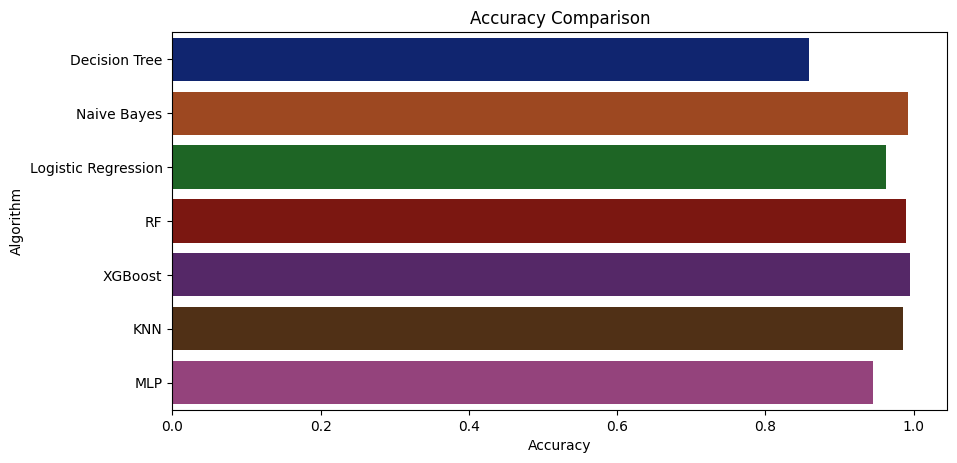

In [202]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y =modelName,palette='dark')

In [203]:
accuracy_models = dict(zip(modelName, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.8590909090909091
Naive Bayes --> 0.9924242424242424
Logistic Regression --> 0.9621212121212122
RF --> 0.9893939393939394
XGBoost --> 0.9954545454545455
KNN --> 0.9848484848484849
MLP --> 0.9454545454545454


In [204]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

['coffee']


In [205]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = mlp.predict(data)
print(prediction)

['jute']


# Stacking the above models and analysing the combine model

In [206]:

# Define estimators
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

In [207]:
estimator_list = [
    ('knn',knn),
    ('XGB',XB),
    ('LR',LogReg),
    ('dt',DecisionTree),
    ('rf',RF),
    ('NBS',NaiveBayes),
    ("MLP",mlp) ]

In [208]:
# Build stack model
stack_model = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression()
)

In [209]:
# Train stacked model
stack_model.fit(Xtrain, Ytrain)
actualModel.append(stack_model)

In [210]:
y_test_pred = stack_model.predict(Xtest)

In [211]:
stack_model_test_accuracy = metrics.accuracy_score(Ytest, y_test_pred) # Calculate Accuracy

In [212]:
acc.append(stack_model_test_accuracy)
modelName.append('Stack_7')

In [213]:
stack_model_test_accuracy

0.9954545454545455

Max Voting


The max voting method is generally used for classification problems. In this technique, multiple models are used to make predictions for each data point. The predictions by each model are considered as a ‘vote’. The predictions which we get from the majority of the models are used as the final prediction.

For example, when you asked 5 of your colleagues to rate your movie (out of 5); we’ll assume three of them rated it as 4 while two of them gave it a 5. Since the majority gave a rating of 4, the final rating will be taken as 4. You can consider this as taking the mode of all the predictions.

# Ensembling the RandomForestClassifier with others and comparing the accuracy

In [214]:
acc1=[]
modelName1=[]

for i in acc:
  acc1.append(i)

for i in modelName:
  modelName1.append(i); 

acc=[]
modelName=[]

In [215]:
from sklearn.ensemble import VotingClassifier
model1 = xgb.XGBClassifier(eval_metric='merror')
model2 = tree.DecisionTreeClassifier(random_state=1)
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='hard')
model.fit(Xtrain,Ytrain) 
x=model.score(Xtest,Ytest)
acc.append(x)
modelName.append("XGBoost-DecisionTree")
actualModel.append(model)

In [216]:
score = cross_val_score(model,features,target,cv=5)
score

array([0.99318182, 0.98409091, 0.99318182, 0.99090909, 0.99090909])

In [217]:
from sklearn.ensemble import VotingClassifier
model1 = RandomForestClassifier(random_state=1)
model2 = xgb.XGBClassifier(eval_metric='merror')
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='hard')
model.fit(Xtrain,Ytrain) 
x=model.score(Xtest,Ytest)
acc.append(x)
modelName.append("XGBoost-RandomForest")
actualModel.append(model)

In [218]:
score = cross_val_score(model,features,target,cv=5)
score

array([0.99318182, 0.99090909, 0.99545455, 0.99090909, 0.99090909])

In [219]:
from sklearn.ensemble import VotingClassifier
model1 = GaussianNB()
model2 = xgb.XGBClassifier(eval_metric='merror')
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='hard')
model.fit(Xtrain,Ytrain)
x=model.score(Xtest,Ytest)
acc.append(x)
modelName.append("XGBoost-GaussianNB")
actualModel.append(model)

In [220]:
score = cross_val_score(model,features,target,cv=5)
score

array([0.99318182, 0.99318182, 0.99318182, 0.99090909, 0.98636364])

In [221]:
from sklearn.ensemble import VotingClassifier
model1 = xgb.XGBClassifier(eval_metric='merror')
model2 = LogisticRegression(random_state=1)
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='hard')
model.fit(Xtrain,Ytrain)
model.score(Xtest,Ytest)
x=model.score(Xtest,Ytest)
acc.append(x)
modelName.append("XGBoost-LogisticRegression")
actualModel.append(model)

In [222]:
score = cross_val_score(model,features,target,cv=5)
score

array([0.97045455, 0.98181818, 0.96363636, 0.97045455, 0.97045455])

In [223]:
from sklearn.ensemble import VotingClassifier
model1 = xgb.XGBClassifier(eval_metric='merror')
model2 = KNeighborsClassifier(5)
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='hard')
model.fit(Xtrain,Ytrain)
model.score(Xtest,Ytest)
x=model.score(Xtest,Ytest)
acc.append(x)
modelName.append("XGBoost-KNN")
actualModel.append(model)

Now by voting we have compare the pair of 2-2 algorithms, lets check the accuracy of each combination

In [224]:
accuracy_models = dict(zip(modelName, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

XGBoost-DecisionTree --> 0.9893939393939394
XGBoost-RandomForest --> 0.9939393939393939
XGBoost-GaussianNB --> 0.990909090909091
XGBoost-LogisticRegression --> 0.9742424242424242
XGBoost-KNN --> 0.9878787878787879


<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

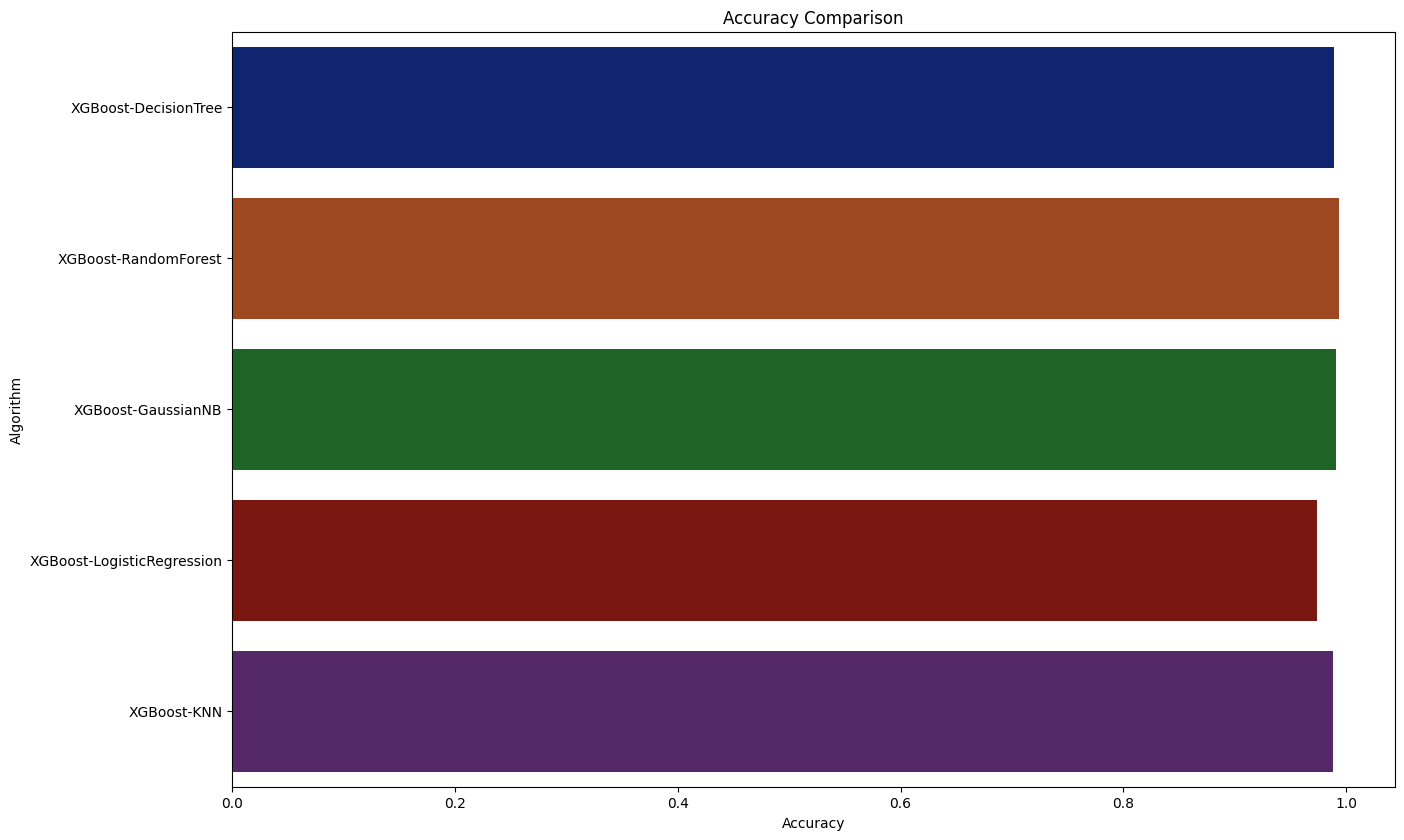

In [225]:
plt.figure(figsize=[15,10],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y =modelName,palette='dark')

# Now by using the voting lets combine 3 algorithms togther and check their accuracy

In [226]:

for i in acc:
  acc1.append(i)

for i in modelName:
  modelName1.append(i); 

acc=[]
modelName=[]

In [227]:

model1 = xgb.XGBClassifier(eval_metric='merror')
model2 = RandomForestClassifier(random_state=1)
model3= tree.DecisionTreeClassifier(random_state=1)
model = VotingClassifier(estimators=[('XGB', model1), ('RF', model2), ('DT', model2)], voting='hard')
model.fit(Xtrain,Ytrain)
x=model.score(Xtest,Ytest)
acc.append(x)
modelName.append("XGB-RF-DT")
actualModel.append(model)

In [228]:
score = cross_val_score(model,features,target,cv=5)
score

array([0.99545455, 0.99318182, 0.99772727, 0.99318182, 0.99090909])

In [229]:
model1 = xgb.XGBClassifier(eval_metric='merror')
model2 = LogisticRegression(random_state=1)
model3= RandomForestClassifier(random_state=1)
model = VotingClassifier(estimators=[('xgb', model1), ('lr', model2), ('RF', model2)], voting='hard')
model.fit(Xtrain,Ytrain)
x=model.score(Xtest,Ytest)
acc.append(x)
modelName.append("XGB-RF-LR")
actualModel.append(model)

In [230]:
score = cross_val_score(model,features,target,cv=5)
score

array([0.95      , 0.96590909, 0.94772727, 0.96590909, 0.94318182])

In [231]:
model1 = xgb.XGBClassifier(eval_metric='merror')
model2 = RandomForestClassifier(random_state=1)
model3= GaussianNB()
model = VotingClassifier(estimators=[('gnb', model1), ('RFC', model2), ('XGB', model2)], voting='hard')
model.fit(Xtrain,Ytrain)
x=model.score(Xtest,Ytest)
acc.append(x)
modelName.append("XGB-RF-GNB")
actualModel.append(model)

In [232]:
score = cross_val_score(model,features,target,cv=5)
score

array([0.99545455, 0.99318182, 0.99772727, 0.99318182, 0.99090909])

In [233]:
model1 = xgb.XGBClassifier(eval_metric='merror')
model2 =  LogisticRegression(random_state=1)
model3= tree.DecisionTreeClassifier(random_state=1)
model = VotingClassifier(estimators=[('XGB', model1), ('LR', model2), ('dt', model2)], voting='hard')
model.fit(Xtrain,Ytrain)
x=model.score(Xtest,Ytest)
acc.append(x)
modelName.append("XGB-DT-LR")
actualModel.append(model)

In [234]:
score = cross_val_score(model,features,target,cv=5)
score

array([0.95      , 0.96590909, 0.94772727, 0.96590909, 0.94318182])

In [235]:
model1 = GaussianNB()
model2 = xgb.XGBClassifier(eval_metric='merror')
model3= tree.DecisionTreeClassifier(random_state=1)
model = VotingClassifier(estimators=[('gnb', model1), ('xgb', model2), ('dt', model2)], voting='hard')
model.fit(Xtrain,Ytrain)
x=model.score(Xtest,Ytest)
acc.append(x)
modelName.append("XGB-DT-GNB")
actualModel.append(model)

In [236]:
score = cross_val_score(model,features,target,cv=5)
score

array([0.99318182, 0.99318182, 0.99318182, 0.99090909, 0.99090909])

In [237]:
model1 = GaussianNB()
model2 = LogisticRegression(random_state=1)
model3= xgb.XGBClassifier(eval_metric='merror')
model = VotingClassifier(estimators=[('gnb', model1), ('lr', model2), ('RFC', model2)], voting='hard')
model.fit(Xtrain,Ytrain)
x=model.score(Xtest,Ytest)
acc.append(x)
modelName.append("XGB-LR-GNB")
actualModel.append(model)

In [238]:
score = cross_val_score(model,features,target,cv=5)
score

array([0.95      , 0.96590909, 0.94772727, 0.96590909, 0.94318182])

# Now by voting we have compare the combination of 3-3 algorithms, lets check the accuracy of each combination

In [239]:
accuracy_models = dict(zip(modelName, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

XGB-RF-DT --> 0.9954545454545455
XGB-RF-LR --> 0.9621212121212122
XGB-RF-GNB --> 0.9954545454545455
XGB-DT-LR --> 0.9621212121212122
XGB-DT-GNB --> 0.9954545454545455
XGB-LR-GNB --> 0.9621212121212122


<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

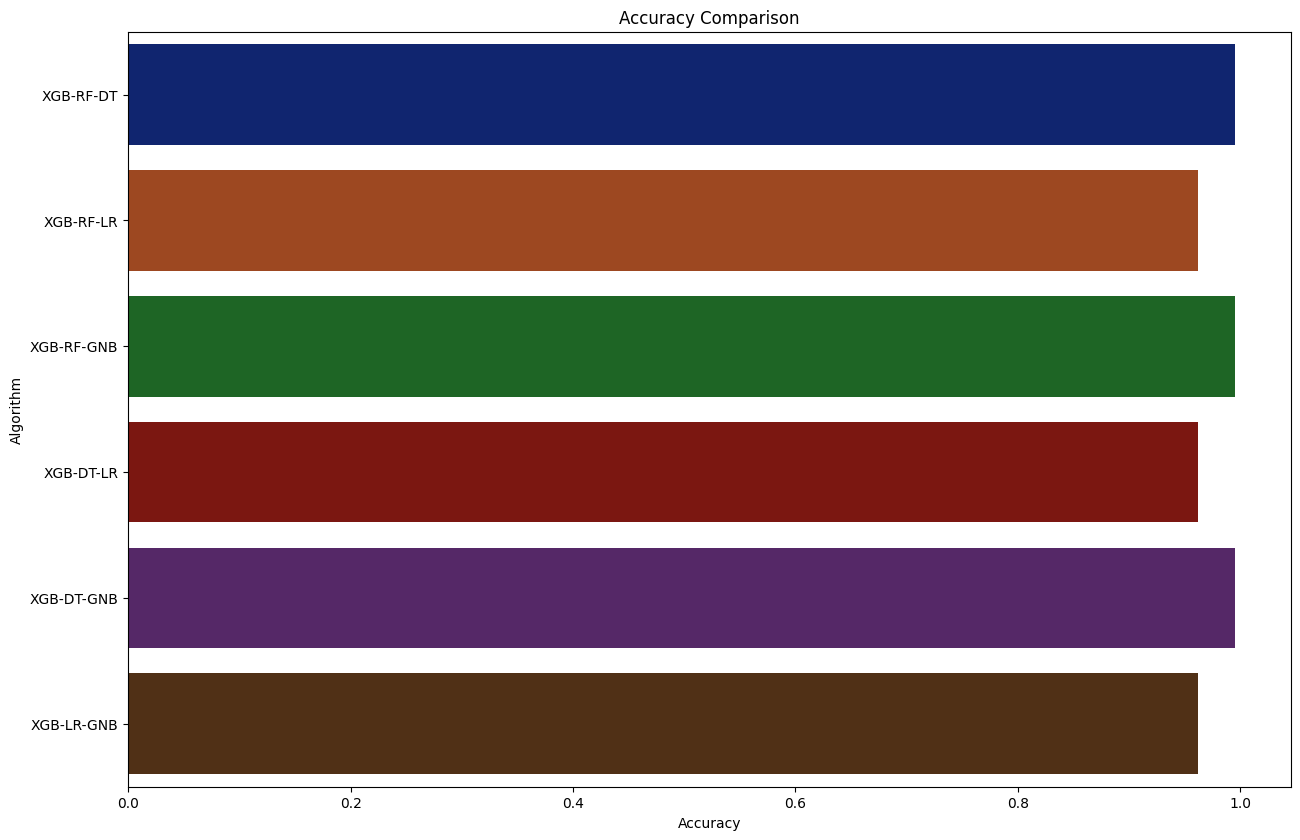

In [240]:
plt.figure(figsize=[15,10],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y =modelName,palette='dark')

# Campare the combination of 4-4 algorithms

In [241]:

for i in acc:
  acc1.append(i)

for i in modelName:
  modelName1.append(i); 

acc=[]
modelName=[]

In [242]:
model1 = xgb.XGBClassifier(eval_metric='merror')
model2 = LogisticRegression(random_state=1)
model3= tree.DecisionTreeClassifier(random_state=1)
model4= RandomForestClassifier(random_state=1)
model = VotingClassifier(estimators=[('XGB', model1), ('lr', model2), ('dt', model3),("RFC",model4)], voting='hard')
model.fit(Xtrain,Ytrain)
x=model.score(Xtest,Ytest)
acc.append(x)
modelName.append("XGB-RF-DT-LR")
actualModel.append(model)

In [243]:
score = cross_val_score(model,features,target,cv=5)
score

array([0.99318182, 0.99318182, 0.99545455, 0.99545455, 0.98863636])

In [244]:
model1 = GaussianNB()
model2 = LogisticRegression(random_state=1)
model3= tree.DecisionTreeClassifier(random_state=1)
model4= xgb.XGBClassifier(eval_metric='merror')
model = VotingClassifier(estimators=[('gnb', model1), ('lr', model2), ('dt', model3),("xgb",model4)], voting='hard')
model.fit(Xtrain,Ytrain)
x=model.score(Xtest,Ytest)
acc.append(x)
modelName.append("XGB-DT-LR-GNB")
actualModel.append(model)

In [245]:
score = cross_val_score(model,features,target,cv=5)
score

array([0.99318182, 0.99318182, 0.99318182, 0.99318182, 0.98636364])

In [246]:
model1 = xgb.XGBClassifier(eval_metric='merror')
model2 = LogisticRegression(random_state=1)
model3= GaussianNB()
model4= RandomForestClassifier(random_state=1)
model = VotingClassifier(estimators=[('xgb', model1), ('lr', model2), ('GNB', model3),("RFC",model4)], voting='hard')
model.fit(Xtrain,Ytrain)
x=model.score(Xtest,Ytest)
acc.append(x)
modelName.append("XGB-RF-LR-GNB")
actualModel.append(model)

In [247]:
score = cross_val_score(model,features,target,cv=5)
score

array([0.99318182, 0.99090909, 0.99545455, 0.99318182, 0.98863636])

In [248]:
model1 = xgb.XGBClassifier(eval_metric='merror')
model2 = GaussianNB()
model3= tree.DecisionTreeClassifier(random_state=1)
model4= RandomForestClassifier(random_state=1)
model = VotingClassifier(estimators=[('xgb', model1), ('lr', model2), ('dt', model3),("RFC",model4)], voting='hard')
model.fit(Xtrain,Ytrain)
x=model.score(Xtest,Ytest)
acc.append(x)
modelName.append("XGB-RF-DT-GNB")
actualModel.append(model)

In [249]:
score = cross_val_score(model,features,target,cv=5)
score

array([0.99772727, 0.99318182, 0.99772727, 0.99545455, 0.99090909])

# Analysis between different combination of model

In [250]:
accuracy_models = dict(zip(modelName, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

XGB-RF-DT-LR --> 0.9954545454545455
XGB-DT-LR-GNB --> 0.9924242424242424
XGB-RF-LR-GNB --> 0.9924242424242424
XGB-RF-DT-GNB --> 0.9954545454545455


<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

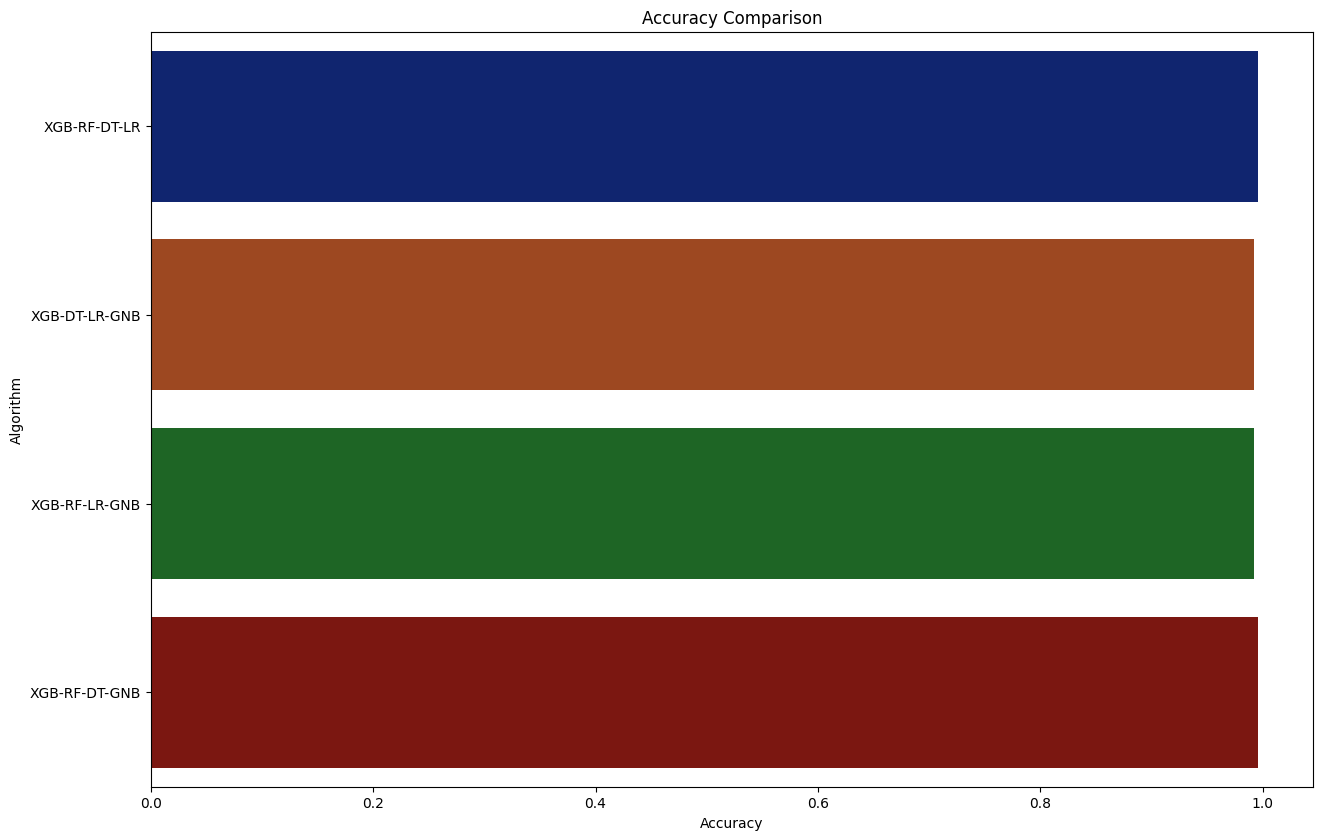

In [251]:
plt.figure(figsize=[15,10],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y =modelName,palette='dark')

In [252]:

for i in acc:
  acc1.append(i)

for i in modelName:
  modelName1.append(i); 

acc=[]
modelName=[]

# Comparing all algorithms we have train till now

In [253]:
accuracy_models = dict(zip(modelName1, acc1))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.8590909090909091
Naive Bayes --> 0.9924242424242424
Logistic Regression --> 0.9621212121212122
RF --> 0.9893939393939394
XGBoost --> 0.9954545454545455
KNN --> 0.9848484848484849
MLP --> 0.9454545454545454
Stack_7 --> 0.9954545454545455
XGBoost-DecisionTree --> 0.9893939393939394
XGBoost-RandomForest --> 0.9939393939393939
XGBoost-GaussianNB --> 0.990909090909091
XGBoost-LogisticRegression --> 0.9742424242424242
XGBoost-KNN --> 0.9878787878787879
XGB-RF-DT --> 0.9954545454545455
XGB-RF-LR --> 0.9621212121212122
XGB-RF-GNB --> 0.9954545454545455
XGB-DT-LR --> 0.9621212121212122
XGB-DT-GNB --> 0.9954545454545455
XGB-LR-GNB --> 0.9621212121212122
XGB-RF-DT-LR --> 0.9954545454545455
XGB-DT-LR-GNB --> 0.9924242424242424
XGB-RF-LR-GNB --> 0.9924242424242424
XGB-RF-DT-GNB --> 0.9954545454545455


In [254]:
max(acc1)
index=acc1.index(max(acc1))

In [255]:
index

4

In [256]:
print("The best algorithm is: ",end="")
print(modelName1[index])


The best algorithm is: XGBoost


<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

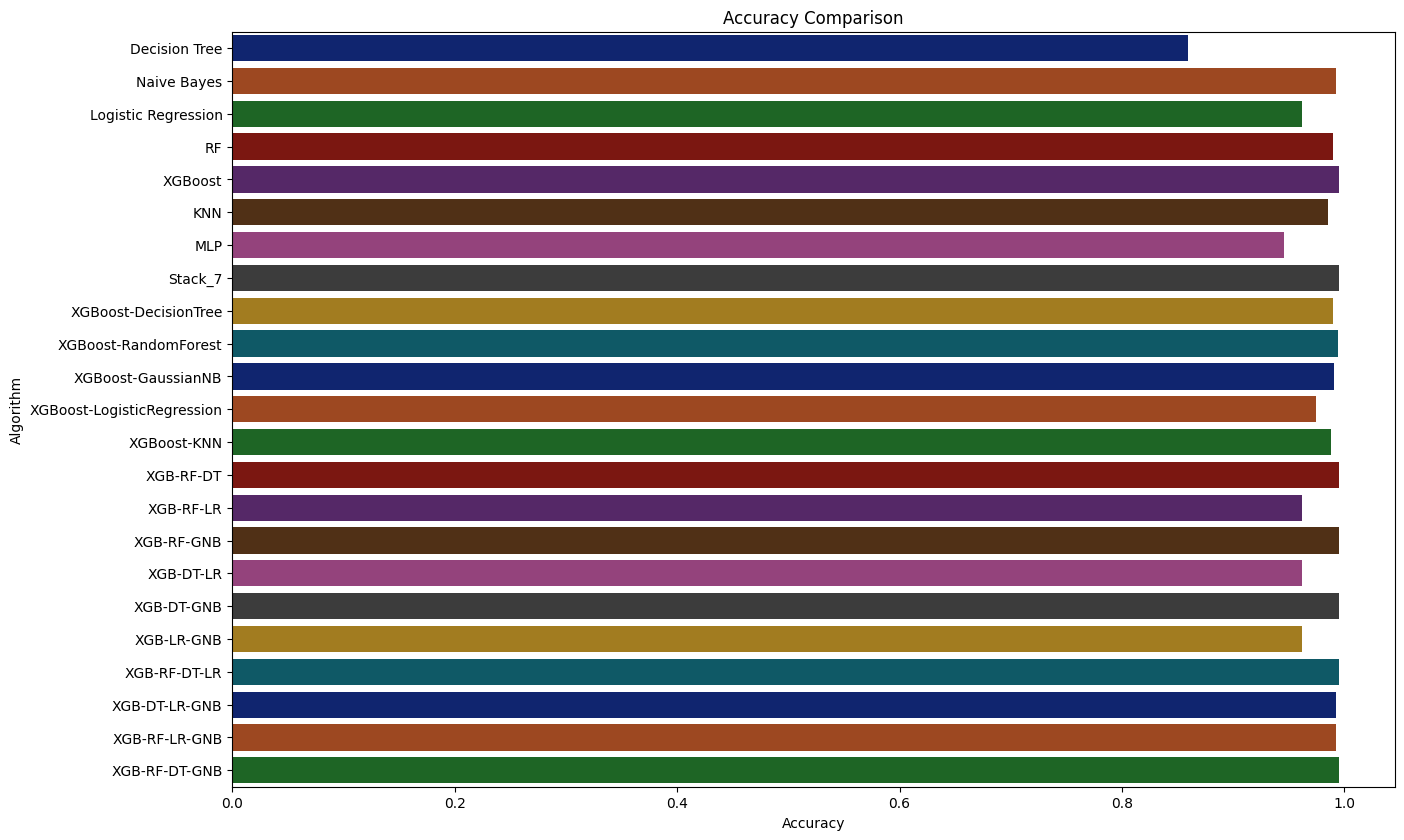

In [257]:
plt.figure(figsize=[15,10],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc1,y =modelName1,palette='dark')

In [258]:
modelName1

['Decision Tree',
 'Naive Bayes',
 'Logistic Regression',
 'RF',
 'XGBoost',
 'KNN',
 'MLP',
 'Stack_7',
 'XGBoost-DecisionTree',
 'XGBoost-RandomForest',
 'XGBoost-GaussianNB',
 'XGBoost-LogisticRegression',
 'XGBoost-KNN',
 'XGB-RF-DT',
 'XGB-RF-LR',
 'XGB-RF-GNB',
 'XGB-DT-LR',
 'XGB-DT-GNB',
 'XGB-LR-GNB',
 'XGB-RF-DT-LR',
 'XGB-DT-LR-GNB',
 'XGB-RF-LR-GNB',
 'XGB-RF-DT-GNB']

In [259]:
acc1

[0.8590909090909091,
 0.9924242424242424,
 0.9621212121212122,
 0.9893939393939394,
 0.9954545454545455,
 0.9848484848484849,
 0.9454545454545454,
 0.9954545454545455,
 0.9893939393939394,
 0.9939393939393939,
 0.990909090909091,
 0.9742424242424242,
 0.9878787878787879,
 0.9954545454545455,
 0.9621212121212122,
 0.9954545454545455,
 0.9621212121212122,
 0.9954545454545455,
 0.9621212121212122,
 0.9954545454545455,
 0.9924242424242424,
 0.9924242424242424,
 0.9954545454545455]

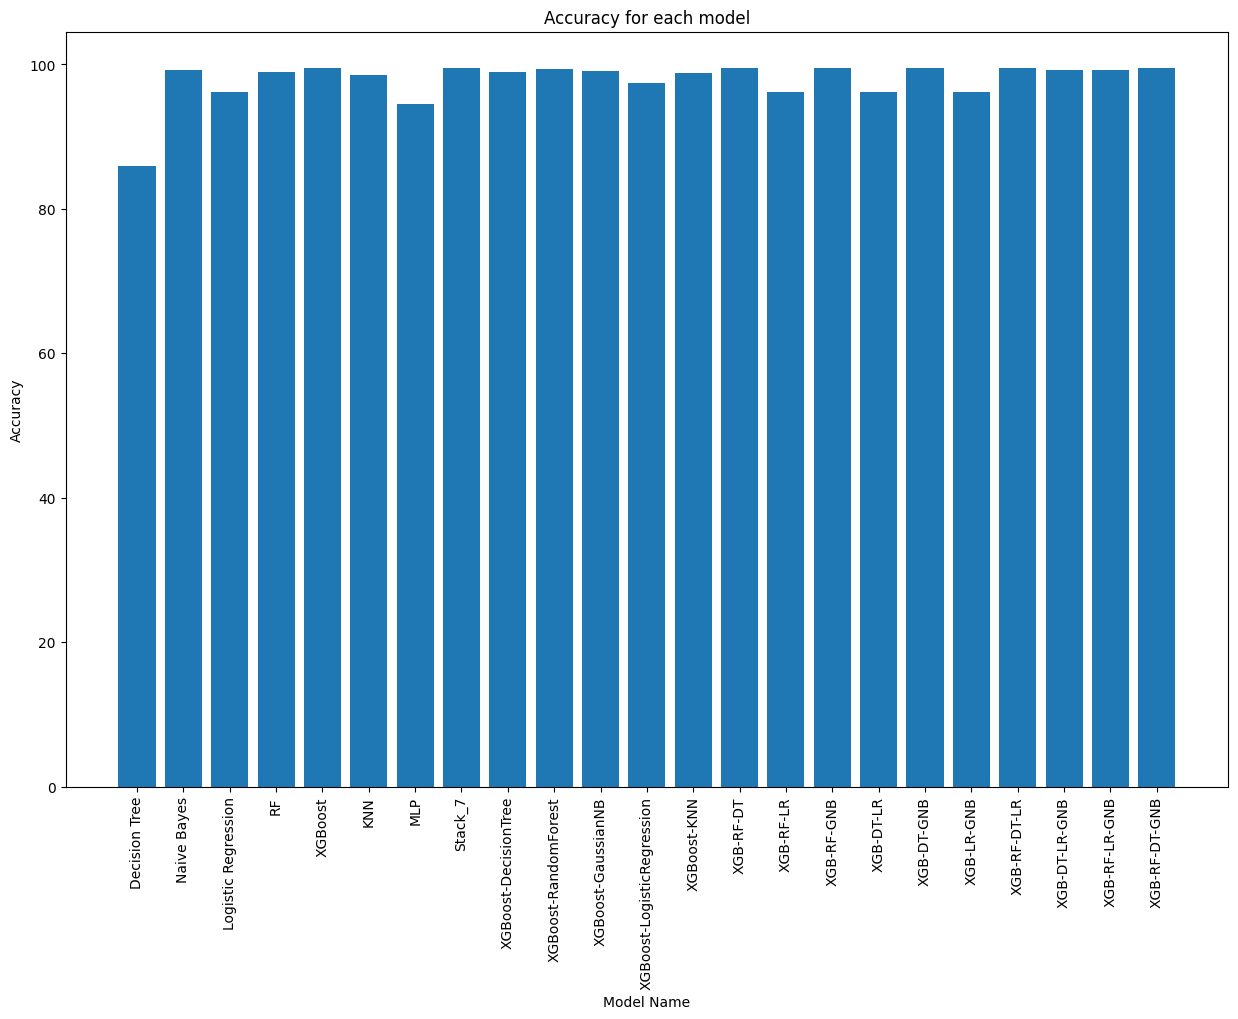

In [260]:
import matplotlib.pyplot as plt
 
Percent1 = []
for i in acc1:
  Percent1.append(i*100)

plt.figure(figsize=[15,10],dpi = 100)
plt.bar(modelName1, Percent1)
plt.xticks(rotation=90)
plt.xlabel("Model Name")
plt.ylabel("Accuracy")
plt.title("Accuracy for each model")
plt.show()



# Building the combine model of XGBoost's submodel and then use stacking to build final model

In [261]:
xg_model_name=[]

In [262]:
actualModel[0]

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=2)

In [263]:
for i in range(1,11):
  # Splitting into train and test data
 
  Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.3,random_state =2)
  le = LabelEncoder()
  y_train = le.fit_transform(Ytrain)
  XB = xgb.XGBClassifier(eval_metric='merror')
  XB.fit(Xtrain,y_train)
 

  y_pred = XB.predict(Xtest)
  y_pred = le.inverse_transform(y_pred)

  x = metrics.accuracy_score(Ytest, y_pred) 
  xg_model_name.append(XB) 
  print("XGBoost's Accuracy is: ", x) 

XGBoost's Accuracy is:  0.9954545454545455
XGBoost's Accuracy is:  0.9954545454545455
XGBoost's Accuracy is:  0.9954545454545455
XGBoost's Accuracy is:  0.9954545454545455
XGBoost's Accuracy is:  0.9954545454545455
XGBoost's Accuracy is:  0.9954545454545455
XGBoost's Accuracy is:  0.9954545454545455
XGBoost's Accuracy is:  0.9954545454545455
XGBoost's Accuracy is:  0.9954545454545455
XGBoost's Accuracy is:  0.9954545454545455


In [264]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.3,random_state =2)

In [265]:
res_estimator_list = [(("xgb"+str(i)), (xg_model_name[i]))
                       for i in range(len(xg_model_name)) ]

In [268]:
accuracyOfStackModel=[]
for model in actualModel:
  xg_stack_model = StackingClassifier(
    estimators=res_estimator_list, final_estimator=model)
  xg_stack_model.fit(Xtrain, Ytrain)
  y_test_pred = xg_stack_model.predict(Xtest)
  xg_stack_model_test_accuracy = round(metrics.accuracy_score(Ytest, y_test_pred)*100,2) # Calculate Accuracy
  accuracyOfStackModel.append(xg_stack_model_test_accuracy)

In [282]:
max=0
index=-1
for i in range(len(accuracyOfStackModel)):
    print(str(modelName1[i])+" accuracy is "+str(accuracyOfStackModel[i]))
    if(accuracyOfStackModel[i]>=max):
        max=accuracyOfStackModel[i]
        index=i
   

Decision Tree accuracy is 52.73
Naive Bayes accuracy is 95.0
Logistic Regression accuracy is 99.7
RF accuracy is 99.24
XGBoost accuracy is 99.24
KNN accuracy is 99.39
MLP accuracy is 99.7
Stack_7 accuracy is 99.24
XGBoost-DecisionTree accuracy is 99.09
XGBoost-RandomForest accuracy is 99.24
XGBoost-GaussianNB accuracy is 98.94
XGBoost-LogisticRegression accuracy is 99.55
XGBoost-KNN accuracy is 99.24
XGB-RF-DT accuracy is 99.24
XGB-RF-LR accuracy is 99.7
XGB-RF-GNB accuracy is 99.24
XGB-DT-LR accuracy is 99.7
XGB-DT-GNB accuracy is 99.24
XGB-LR-GNB accuracy is 99.7
XGB-RF-DT-LR accuracy is 99.24
XGB-DT-LR-GNB accuracy is 99.24
XGB-RF-LR-GNB accuracy is 99.24
XGB-RF-DT-GNB accuracy is 99.24


In [283]:
print("The best final estimator is: "+str(modelName1[index]+" with the accuracy of "+str(max)))

The best final estimator is: XGB-LR-GNB with the accuracy of 99.7


In [284]:
 # Dump the trained Naive Bayes classifier with Pickle
xgbs_pkl_filename = 'xgbs.pkl'
# Open the file to save as pkl file
xgbs_Model_pkl = open(xgbs_pkl_filename, 'wb')
pickle.dump(actualModel[index], xgbs_Model_pkl)
# Close the pickle instances
xgbs_Model_pkl.close()

# Bagging of XGBooster
  

In [271]:
from sklearn.ensemble import BaggingClassifier

In [272]:
bagging_clf = BaggingClassifier(base_estimator=xgb.XGBClassifier(),
                        n_estimators=500,max_features=5, random_state=42)

In [273]:
bagging_clf.fit(Xtrain, Ytrain)

In [274]:
y_pred=bagging_clf.predict(Xtest);

In [275]:
accuracy=metrics.accuracy_score(Ytest, y_pred)*100

In [276]:
accuracy

Conclusion: The best way to train model is by stacking the submodel of XGBoost with final estimator as a combination of XGBoost-LogisticRegression-GuassianNaiveBayes